In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [3]:
path='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'
categories = ['benign', 'malignant', 'normal']

data = []

for category in categories:
    category_path = os.path.join(path, category)
    
    for filename in os.listdir(category_path):
        if filename.endswith('.png') and '_mask' not in filename:  # Exclude mask images
            file_path = os.path.join(category_path, filename)
            data.append({'image_path': file_path, 'label': category})

df = pd.DataFrame(data)

In [4]:
df.head()

,image_path,label
0,/kaggle/input/breast-ultrasound-images-dataset...,benign
1,/kaggle/input/breast-ultrasound-images-dataset...,benign
2,/kaggle/input/breast-ultrasound-images-dataset...,benign
3,/kaggle/input/breast-ultrasound-images-dataset...,benign
4,/kaggle/input/breast-ultrasound-images-dataset...,benign


In [10]:
df['image_path'] = df['image_path'].astype(str)

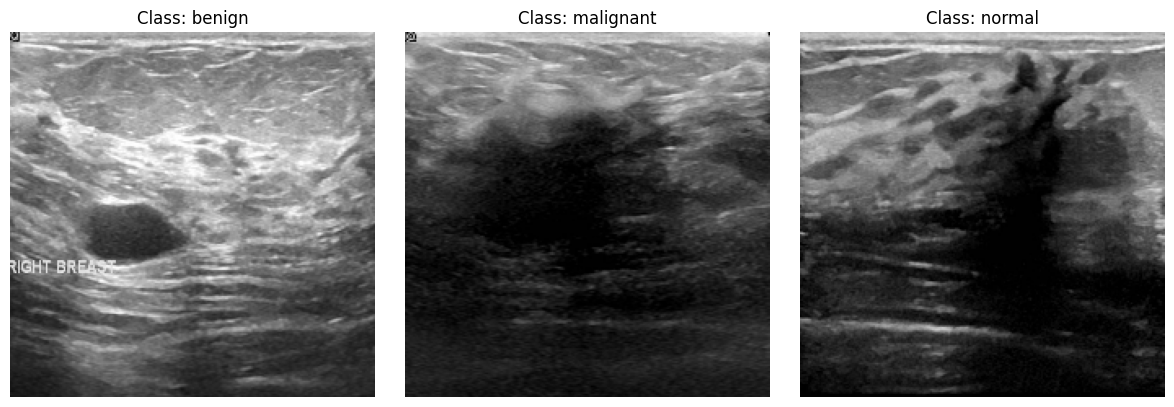

In [5]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

def load_image(filepath):
    try:
        img = tf.io.read_file(filepath)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [224, 224])
        img_np = img.numpy().astype(np.uint8) 
        return img_np
    except:
        return None

unique_classes = df["label"].unique()
sample_images = {} 

for label in unique_classes:
    sample_image_path = df[df["label"] == label]["image_path"].values[0] 
    sample_images[label] = load_image(sample_image_path)

fig, axes = plt.subplots(1, len(unique_classes), figsize=(12, 4))

for i, (label, image) in enumerate(sample_images.items()):
    if image is not None:
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis("off")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42,stratify=df['label'])

In [7]:
train.shape

(1262, 2)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen=ImageDataGenerator(rescale=1/255,validation_split=0.2) #normalising the pixel values

In [7]:
image_size=(128,128)
batch_size=32
train_gen=gen.flow_from_dataframe(
train,
x_col='image_path',
y_col='label',
target_size=image_size,
batch_size=batch_size,
class_mode='sparse',
subset='training'
)

Found 500 validated image filenames belonging to 3 classes.


In [8]:
test_gen=gen.flow_from_dataframe(
test,
x_col='image_path',
y_col='label',
target_size=image_size,
batch_size=batch_size,
class_mode='sparse',
subset='training'
) 

Found 125 validated image filenames belonging to 3 classes.


In [9]:
val_gen=gen.flow_from_dataframe(
train,
x_col='image_path',
y_col='label',
target_size=image_size,
batch_size=batch_size,
class_mode='sparse',
subset='validation'    
)

Found 124 validated image filenames belonging to 3 classes.


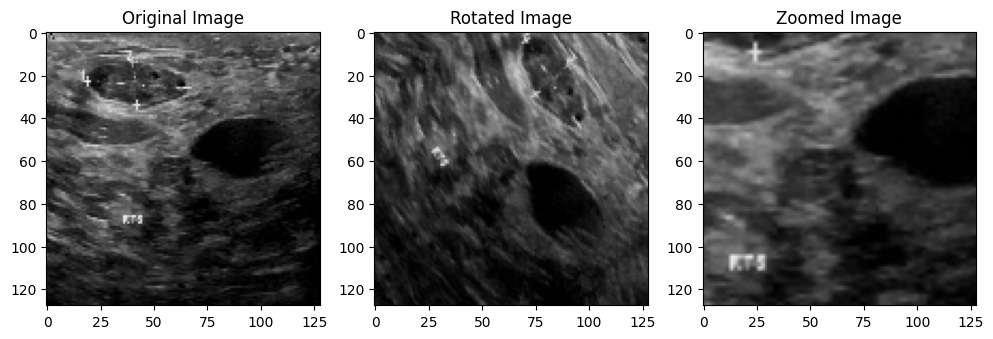

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]
random_rotation = layers.RandomRotation(0.5)
random_zoom = layers.RandomZoom(0.5)

rotated_image = random_rotation(sample_image)
zoomed_image = random_zoom(sample_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(sample_image)  
axes[0].set_title("Original Image")

axes[1].imshow(rotated_image)  
axes[1].set_title("Rotated Image")

axes[2].imshow(zoomed_image)
axes[2].set_title("Zoomed Image")
plt.show()

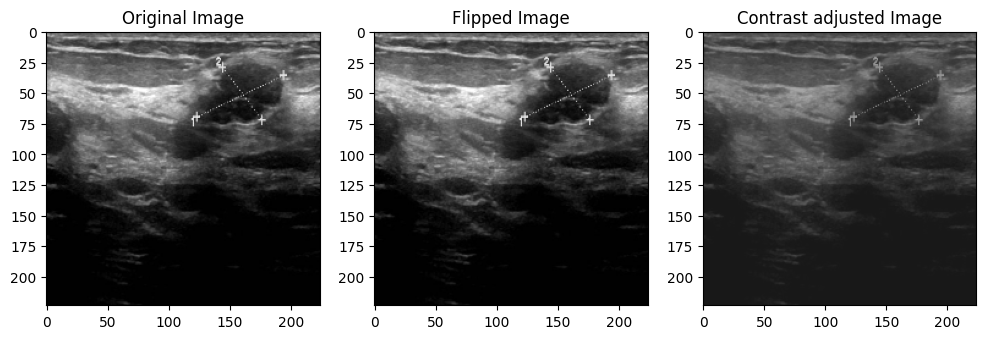

In [13]:
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]

flipping=layers.RandomFlip("horizontal")  
contrast=layers.RandomContrast(0.7)
flipped_image = flipping(sample_image)
adjusted_image = contrast(sample_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(sample_image.numpy())  
axes[0].set_title("Original Image")

axes[1].imshow(flipped_image.numpy())  
axes[1].set_title("Flipped Image")

axes[2].imshow(adjusted_image.numpy())
axes[2].set_title("Contrast adjusted Image")
plt.show()

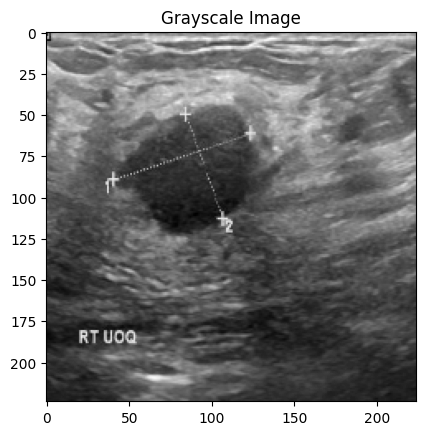

In [14]:
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1] 

image_np = (sample_image.numpy() * 255).astype('uint8') 

gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY) #transforms image into a single channel

plt.imshow(gray_image, cmap="gray") #to display data as an image on a 2D regular raster
plt.title("Grayscale Image")
plt.show()

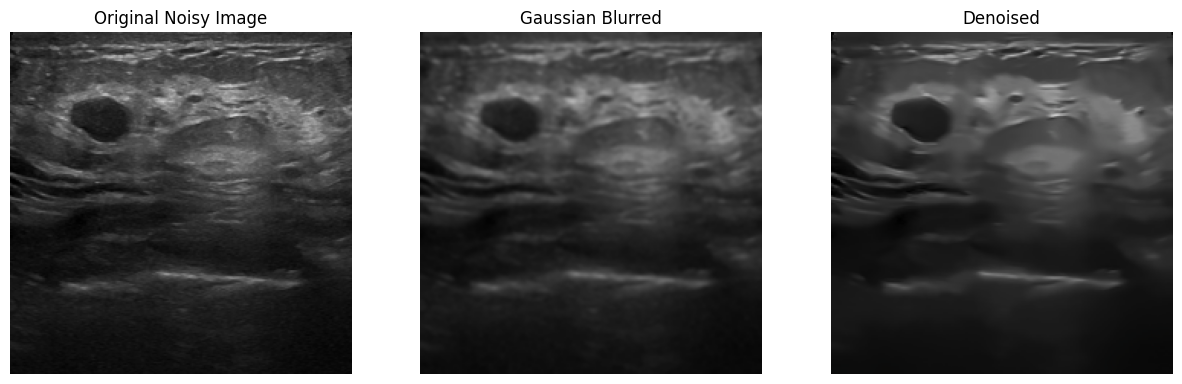

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_array):
    return image_array 

image = train_gen[1][0][1]
image_np = (image.numpy() * 255).astype('uint8') 

gaussian_blur = cv2.GaussianBlur(image_np, (5, 5), 0) #avg of pixel values based on gaussian function

denoised = cv2.fastNlMeansDenoisingColored(image_np, None, 10, 10, 7, 21) #preserves edges and textures 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_np)
ax[0].set_title("Original Noisy Image")
ax[0].axis("off")

ax[1].imshow(gaussian_blur)
ax[1].set_title("Gaussian Blurred")
ax[1].axis("off")

ax[2].imshow(denoised)
ax[2].set_title("Denoised")
ax[2].axis("off")

plt.show()

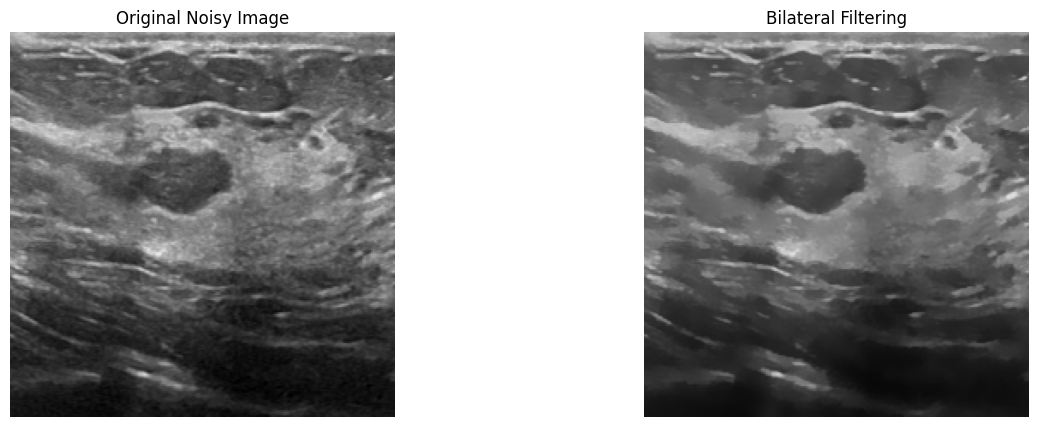

In [18]:
def load_image(image_array):
    return image_array 

image = train_gen[1][0][1]
image_np = (image.numpy() * 255).astype('uint8') 
bilateral_filtering = cv2.bilateralFilter(image_np, 10, 41, 41) #replaces each pixel's value with a weighted average of its neighbors

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image_np)
ax[0].set_title("Original Noisy Image")
ax[0].axis("off")

ax[1].imshow(bilateral_filtering)
ax[1].set_title("Bilateral Filtering")
ax[1].axis("off")

plt.show()

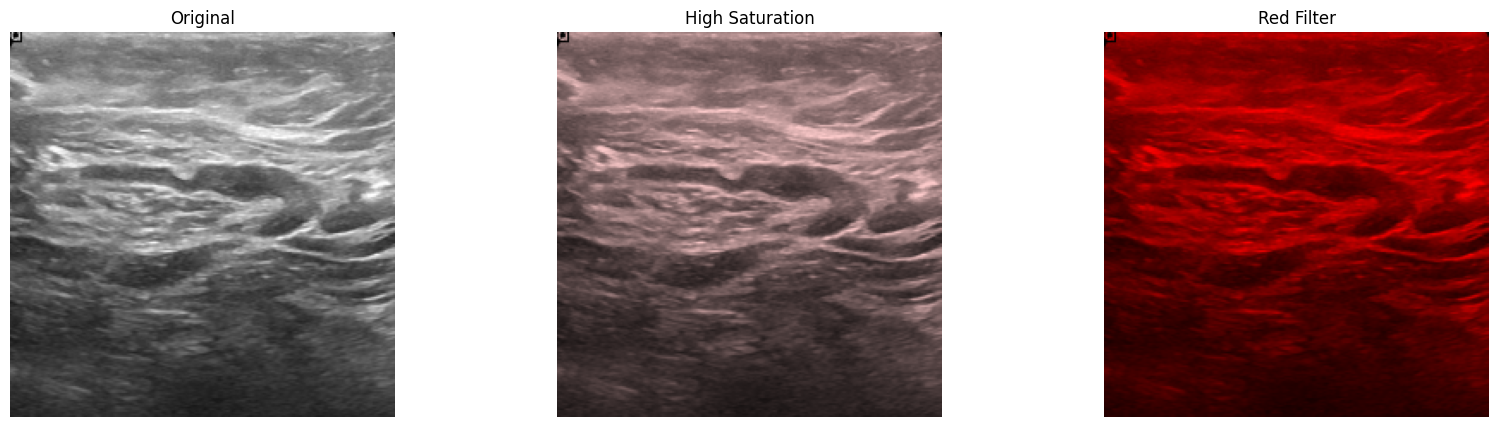

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]
image_np = (sample_image.numpy() * 255).astype('uint8') 

hsv = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV) #Hue Saturation Value
hsv[:, :, 1] = cv2.add(hsv[:, :, 1], 50) # increase saturation of red
saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

red_filter = image_np.copy()
red_filter[:, :, 1] = 0 #removes green  
red_filter[:, :, 2] = 0 #removes blue

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
titles = ["Original","High Saturation","Red Filter"]
images = [sample_image, saturated, red_filter]

for i in range(3):
    ax[i].imshow(images[i], cmap="gray" if i == 1 else None)
    ax[i].set_title(titles[i])
    ax[i].axis("off")

plt.show()

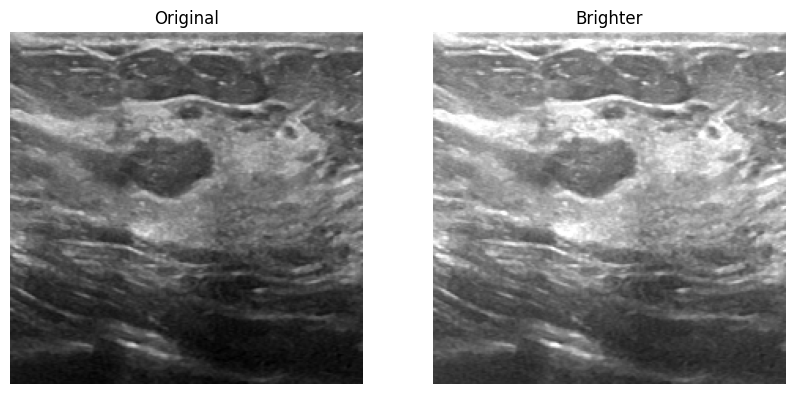

In [107]:
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]
image_np = (sample_image.numpy() * 255).astype('uint8') 

# Increase Brightness
bright = cv2.convertScaleAbs(image_np, alpha=1.2, beta=30)  # alpha: contrast, beta: brightness

fig, ax = plt.subplots(1, 2, figsize=(10,5))
titles = ["Original", "Brighter"]
images = [sample_image,bright]

for i in range(2):
    ax[i].imshow(images[i], cmap="gray" if i == 1 else None)
    ax[i].set_title(titles[i])
    ax[i].axis("off")

plt.show()

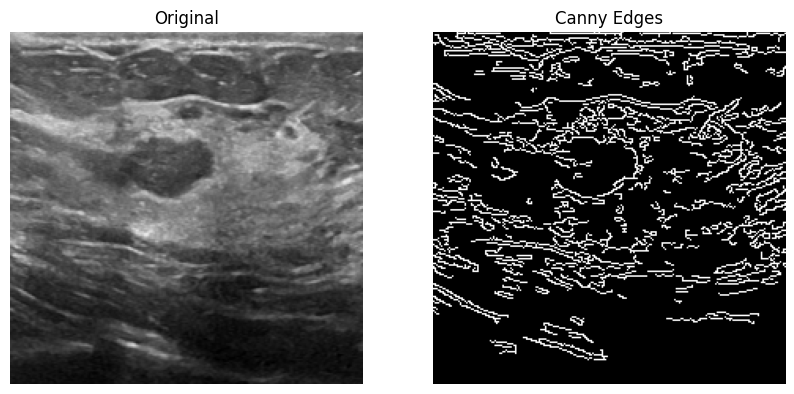

In [111]:
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]
image_np = (sample_image.numpy() * 255).astype('uint8')

edges_canny = cv2.Canny(image_np, 100, 200) #removes weaker gradient responses

fig, ax = plt.subplots(1, 2, figsize=(10,5))
titles = ["Original", "Canny Edges"]
images = [image_np, edges_canny]
for i in range(2):
    ax[i].imshow(images[i], cmap="gray" if i == 1 else None)
    ax[i].set_title(titles[i])
    ax[i].axis("off")

plt.show()


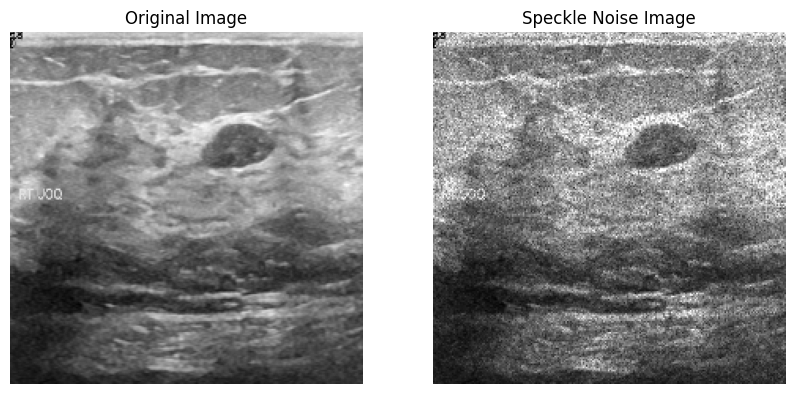

In [112]:
# Load the image
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]  

image_np = (sample_image.numpy() * 255).astype('uint8') 

gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY) 


gray_image = gray_image / 255.0  

noise = np.random.randn(*gray_image.shape) * 0.2  #create gaussian matrix in the shape of the image

noisy_image = gray_image + gray_image * noise #multiply the noise by the image 

noisy_image = np.clip(noisy_image, 0, 1) #ensures pixel values stay within (0,255)

noisy_image = (noisy_image * 255).astype(np.uint8)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap="gray")
plt.title("Speckle Noise Image")
plt.axis("off")

plt.show()


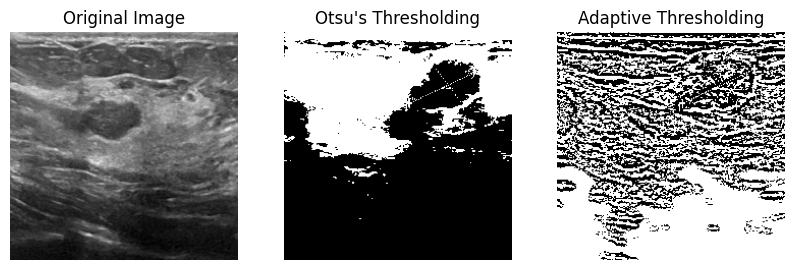

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1]

image_np = (sample_image.numpy() * 255).astype('uint8') 

gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)


_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #calculates the optimal threshold value by minimizing the variance between the two classes of pixels

adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2) #calculates local thresholds for different regions

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")

plt.show()


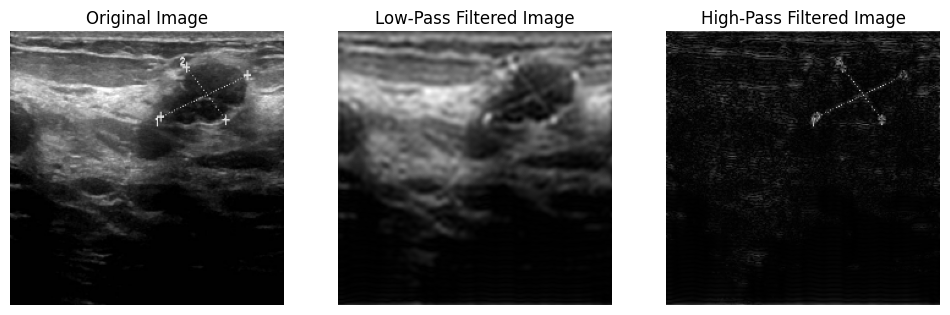

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1] 

image_np = (sample_image.numpy() * 255).astype('uint8') 

image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)


 (Removes noise, keeps smooth regions)
low_pass_filtered, low_pass_spectrum = apply_frequency_filter(image, filter_type="low", cutoff=30) #Removes noise, keeps smooth regions

high_pass_filtered, high_pass_spectrum = apply_frequency_filter(image, filter_type="high", cutoff=30) #Enhances edges and details

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(low_pass_filtered, cmap="gray")
plt.title("Low-Pass Filtered Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(high_pass_filtered, cmap="gray")
plt.title("High-Pass Filtered Image")
plt.axis("off")

plt.show()


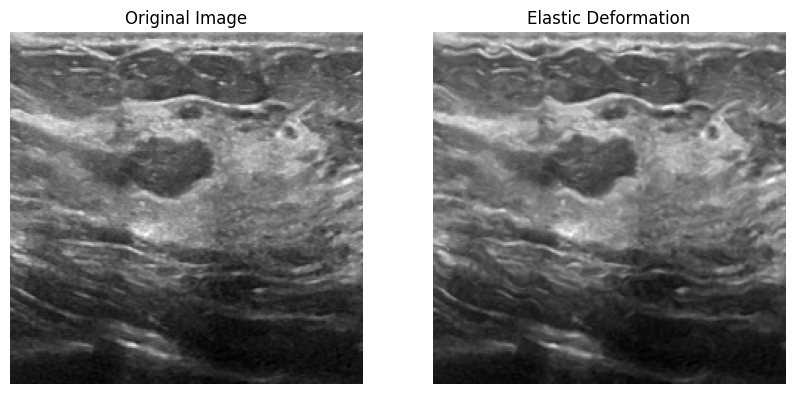

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates, gaussian_filter
#simulates real world variations
def elastic_deformation(image, alpha, sigma, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1)) #shifts pixel locations to show warping effect
 
    deformed_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    
    return deformed_image
def load_image(image_array):
    return image_array 

sample_image = train_gen[1][0][1] 

image_np = (sample_image.numpy() * 255).astype('uint8') 

image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

alpha = 20  # Strength of deformation
sigma = 4   # Smoothing factor
deformed_image = elastic_deformation(image, alpha, sigma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(deformed_image, cmap='gray')
plt.title("Elastic Deformation")
plt.axis("off")

plt.show()

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 699ms/step - accuracy: 0.5011 - loss: 0.9823 - val_accuracy: 0.5357 - val_loss: 0.8783
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 671ms/step - accuracy: 0.6539 - loss: 0.7408 - val_accuracy: 0.5952 - val_loss: 0.8206
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 680ms/step - accuracy: 0.7201 - loss: 0.6262 - val_accuracy: 0.6746 - val_loss: 0.7258
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 662ms/step - accuracy: 0.7739 - loss: 0.5545 - val_accuracy: 0.7063 - val_loss: 0.8391
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 684ms/step - accuracy: 0.7706 - loss: 0.5295 - val_accuracy: 0.7381 - val_loss: 0.7780
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 684ms/step - accuracy: 0.8061 - loss: 0.4142 - val_accuracy: 0.7579 - val_loss: 0.7577
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 668ms/step - accuracy: 0.8879 - loss: 0.2960 - val_accuracy: 0.7659 - val_loss: 0.9065
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 673ms/step - accuracy: 0.9039 - loss: 0.2416 - val_accuracy: 0.754

In [35]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.7593 - loss: 1.9439
Test Accuracy: 0.7708


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
import tensorflow as tf
from tensorflow.keras import layers

# Define augmentation with input shape
data_augmentation = Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),  # Define input shape here
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal")
])

# Define the model
model = Sequential([
    data_augmentation,  # Augment images before passing to Conv2D
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Adjust based on class count
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,258,435 (62.02 MB)

 Trainable params: 16,258,435 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 678ms/step - accuracy: 0.4539 - loss: 3.1410 - val_accuracy: 0.5198 - val_loss: 0.9074
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 534ms/step - accuracy: 0.5695 - loss: 0.9039 - val_accuracy: 0.6151 - val_loss: 0.8826
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.6317 - loss: 0.8116 - val_accuracy: 0.6151 - val_loss: 0.8858
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 550ms/step - accuracy: 0.6488 - loss: 0.7910 - val_accuracy: 0.6230 - val_loss: 0.7987
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step - accuracy: 0.6420 - loss: 0.7897 - val_accuracy: 0.6230 - val_loss: 0.7905
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step - accuracy: 0.6895 - loss: 0.7532 - val_accuracy: 0.6865 - val_loss: 0.7489
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 526ms/step - accuracy: 0.6799 - loss: 0.7312 - val_accuracy: 0.6349 - val_loss: 0.8511
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 524ms/step - accuracy: 0.7166 - loss: 0.7090 - val_accuracy: 0.646

In [16]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.6744 - loss: 0.6838
Test Accuracy: 0.6838
